# Simple Markov Chain Example

Author: Aleksander Filip Żarnecki (University of Warsaw)

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Consider an atom with three energy states: ground, meta-stable, excited

E = np.array([0.,1.,3.])     # Example energy levels

# Atom is iluminated with laser tuned to ground-excited state transition
# Excitation probability per time unit:

pge = 0.1

# Probability of deexcitation to the ground state (per time unit):

peg = 0.2

# But it has also a small probability of deexcitation to the meta-stable state

pem = 0.01

# Probability of meta-stable state decay to ground state (per time unit)

pmg = 0.01

# All other transfer probabilities are zero

In [3]:
# Build transfer matrix

T = np.array([[1-pge, 0., pge],
             [pmg, 1-pmg, 0.],
             [peg, pem, 1-peg-pem]])


State change function adapted from code by Piero Paialunga

From: https://towardsdatascience.com/saturday-night-modeling-using-markov-chains-with-python-a29188330a1e

In [4]:
def state_change(start_state,trans_matrix):
    row = trans_matrix[start_state]
    ndim = trans_matrix.shape[0]
    index_list = np.arange(ndim)
    end_state = np.random.choice(index_list,p=row)
    return end_state

In [5]:
# Number of cycles to run 

Nmc = 1000

# Assume initial state is ground state

state = np.empty(Nmc+1,dtype=int)
state[0] = 0

for t in range(Nmc):
    state[t+1] = state_change(state[t],T)
    

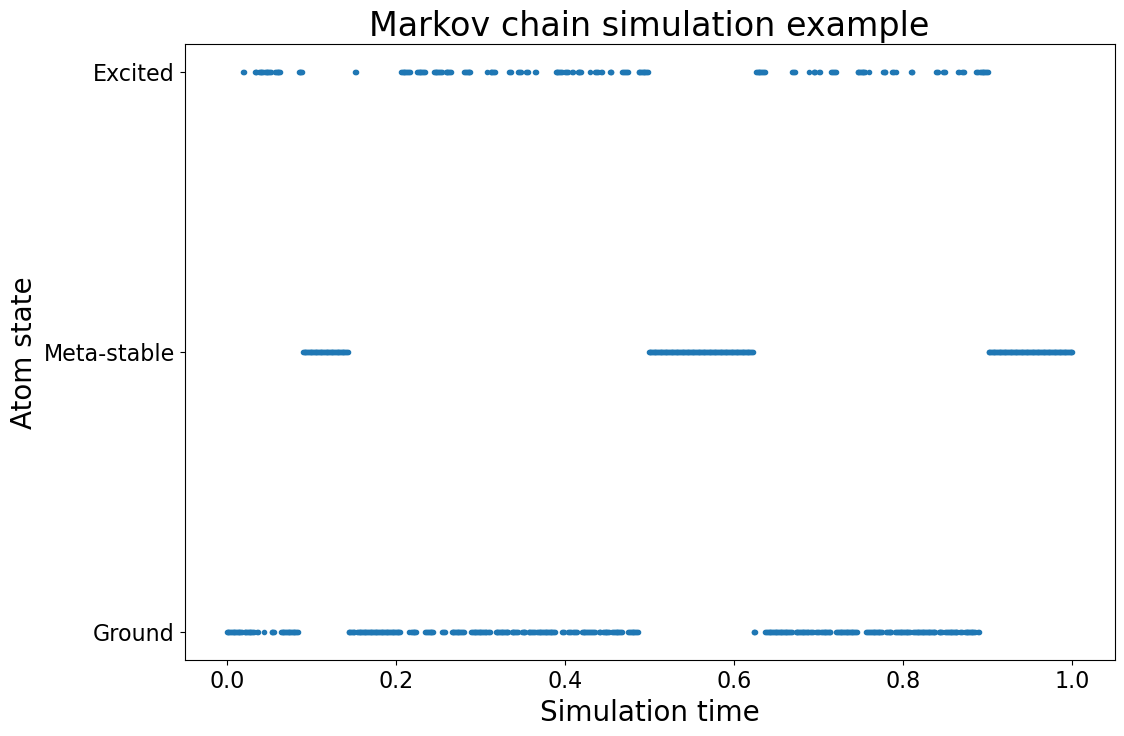

In [6]:
aval = np.linspace(0.,1.,Nmc+1)

plt.figure(figsize=(12,8))

plt.plot(aval, state,'.')
    
plt.xlabel('Simulation time',size=20)
plt.ylabel('Atom state',size=20)
plt.xticks(fontsize=16)
# plt.yticks(fontsize=20)
plt.yticks([0,1,2],['Ground','Meta-stable','Excited'],fontsize=16)
plt.title("Markov chain simulation example",size=24)

fname = '14_atom'

plt.savefig(fname)

plt.show()